# Query 4.1 

Import the csv file of the stock which contained the Bollinger columns as well.
Create a new column 'Call' , whose entries are - 
'Buy' if the stock price is below the lower Bollinger band 
'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band 
'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band 
'Short' if the stock price is above the upper Bollinger band
Now train a classification model with the 3 bollinger columns and the stock price as inputs and 'Calls' as output. Check the accuracy on a test set. (There are many classifier models to choose from, try each one out and compare the accuracy for each)
Import another stock data and create the bollinger columns. Using the already defined model, predict the daily calls for this new stock.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Importing bollinger band data and filling NaN
bollinger = pd.read_csv("Bollinger_band")
bollinger.drop(columns = 'Unnamed: 0',axis=1,inplace=True)
bollinger.fillna(0,inplace=True)
#Creating Call and filling based rest of the values
def call_setter(row):
    global val
    if row['Average Price'] < row['Lower Band']:
        val = 'Buy'
    elif row['Lower Band'] < row['Average Price'] < row['MA']:
        val = 'Hold Buy/Liquidate Short'
    elif row['MA'] < row['Average Price'] < row['Upper Band']:
        val = 'Hold Short/Liquidate Buy'
    elif row['Average Price'] > row['Upper Band']:
        val = 'Short'
    return val
bollinger['Call'] = bollinger.apply(call_setter,axis=1)
#Splitting the datasets
x = bollinger[['MA','Upper Band','Lower Band','Average Price']]
y= bollinger['Call']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

#Fitting different models and comparing their accuracy
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)
print('Accuracy of Logistic regression classifier: {:.2f}'
     .format(logreg.score(xtest, ytest)))

#Decision Tree Classifier
clf = DecisionTreeClassifier().fit(xtrain, ytrain)
print('Accuracy of Decision Tree classifier: {:.2f}'
     .format(clf.score(xtest, ytest)))

#K-Nearest Neighbour
knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)
print('Accuracy of K-NN classifier: {:.2f}'
     .format(knn.score(xtest, ytest)))
#Linear Discriminent Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(xtrain, ytrain)
print('Accuracy of LDA classifier: {:.2f}'
     .format(lda.score(xtest, ytest)))

#GaussianNaiveBayes
gnb = GaussianNB()
gnb.fit(xtrain, ytrain)
print('Accuracy of GNB classifier: {:.2f}'
     .format(gnb.score(xtest, ytest)))
#Support Vector Machine 
svm = SVC()
svm.fit(xtrain, ytrain)
print('Accuracy of SVM classifier: {:.2f}'
     .format(svm.score(xtest, ytest)))



pnb = pd.read_csv('PNB.csv')
pnb['Mean Price'] = pnb['Close Price'].rolling(14).mean()
pnb['Std'] = pnb['Close Price'].rolling(14).std()
pnb['UB'] = pnb['Mean Price'] + (pnb['Std']*2)
pnb['LB'] = pnb['Mean Price'] - (pnb['Std']*2)
pnb.fillna(0,inplace=True)

x2 = pnb[['Mean Price','UB','LB','Average Price']]
#results = logreg.predict(x2)
print(logreg.score(x2,y))

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy of Logistic regression classifier: 0.92
Accuracy of Decision Tree classifier: 0.91
Accuracy of K-NN classifier: 0.91


C:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of LDA classifier: 0.76
Accuracy of GNB classifier: 0.69
Accuracy of SVM classifier: 0.59
0.4190283400809717


# Query 4.2 

Now, we'll again utilize classification to make a trade call, and measure the efficiency of our trading algorithm over the past two years. For this assignment , we will use RandomForest classifier.
Import the stock data file of your choice
Define 4 new columns , whose values are: 
% change between Open and Close price for the day 
% change between Low and High price for the day 
5 day rolling mean of the day to day % change in Close Price 
5 day rolling std of the day to day % change in Close Price
Create a new column 'Action' whose values are: 
1 if next day's price(Close) is greater than present day's. 
(-1) if next day's price(Close) is less than present day's. 
i.e. Action [ i ] = 1 if Close[ i+1 ] > Close[ i ] 
i.e. Action [ i ] = (-1) if Close[ i+1 ] < Close[ i ]
Construct a classification model with the 4 new inputs and 'Action' as target
Check the accuracy of this model , also , plot the net cumulative returns (in %) if we were to follow this algorithmic model

In [2]:
#Voltas Stock has been Imported
volt = pd.read_csv('VOLTAS.csv')

#Defined a function to Calculate %change between prices
def perc_change(data,a,b):
    value = ((data[a]-data[b])/data[b])*100
    return value
volt['Perc_change_OAC'] = perc_change(volt,'Close Price','Open Price')
volt['Perc_change_LAH'] = perc_change(volt,'High Price','Low Price')
volt['Rolling Mean'] = volt['Close Price'].rolling(5).mean()
volt['Rolling std'] = volt['Close Price'].rolling(5).std()
volt.fillna(0,inplace=True)

#Creating Action Column based on the Close Price 
close = volt['Close Price']
i=0
volt['Action']=0
while(i<(len(close)-1)):
    if close[i+1] > close[i]:
        volt['Action'].loc[i]=1
    elif close[i+1] < close[i]:
        volt['Action'].loc[i]=-1    
    i+=1
volt.head(5)          

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Perc_change_OAC,Perc_change_LAH,Rolling Mean,Rolling std,Action
0,VOLTAS,EQ,15-May-2017,433.55,436.00,436.4,430.10,433.40,431.85,432.15,696583,3.010253e+08,14160,327583,47.03,-0.951835,1.464776,0.00,0.000000,1
1,VOLTAS,EQ,16-May-2017,431.85,432.00,438.2,430.70,433.00,432.45,433.46,996780,4.320614e+08,19456,366664,36.78,0.104167,1.741351,0.00,0.000000,-1
2,VOLTAS,EQ,17-May-2017,432.45,435.00,435.0,427.25,430.85,430.20,429.93,686830,2.952867e+08,11494,307390,44.75,-1.103448,1.813926,0.00,0.000000,-1
3,VOLTAS,EQ,18-May-2017,430.20,425.10,427.0,412.70,414.50,414.10,418.14,1231618,5.149912e+08,18700,571822,46.43,-2.587626,3.464987,0.00,0.000000,1
4,VOLTAS,EQ,19-May-2017,414.10,414.35,419.9,410.95,416.00,415.75,414.98,869457,3.608041e+08,29631,313872,36.10,0.337879,2.177881,424.87,9.134454,-1


In [3]:
#Fitting a Random Forest Model
x3 = volt[['Perc_change_OAC','Perc_change_LAH','Rolling Mean','Rolling std']]
y3 = volt['Action']
xtrain3,xtest3,ytrain3,ytest3 = train_test_split(x3,y3)
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(xtrain3,ytrain3)
rfc_predict = rfc.predict(xtest3)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The accuracy of the model is:
0.5483870967741935


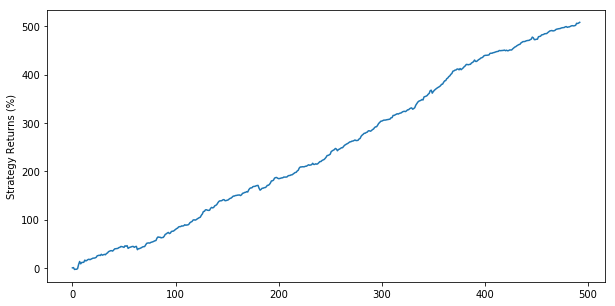

In [19]:
#Accuracy of the Model
print('The accuracy of the model is:')
print(rfc.score(xtest3,ytest3))
#Net Cumulative Return 
netcum = np.log(volt['Close Price'].shift(-1)/volt['Close Price'])*100
#netcum2 = volt['Close Price'].pct_change()*100
strat_return = rfc.predict(x3)
total_return = netcum * strat_return
total_return.cumsum().plot(figsize=(10,5))
plt.ylabel("Strategy Returns (%)")
plt.show()